**Task_1 done
MOVIE GENRE CLASSIFICATION**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt


In [ ]:
# Function to parse the training data
def parse_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split(' ::: ')
            if len(parts) == 4:
                movie_id, title, genre, plot = parts
                data.append({'movie_id': movie_id, 'title': title, 'genre': genre, 'plot': plot})
    return pd.DataFrame(data)


In [ ]:
# Load and parse the training data
train_data_path = '/content/drive/MyDrive/Movie_Genre_dataset/train_data.txt'
train_df = parse_data(train_data_path)

In [ ]:
# Preprocess text data: Convert plot summaries into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf_vectorizer.fit_transform(train_df['plot'])
y = train_df['genre']


In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Train a classifier (Logistic Regression) with a pipeline including scaling with MaxAbsScaler
pipeline = Pipeline([
    ('scaler', MaxAbsScaler()),
    ('classifier', LogisticRegression(max_iter=1000, solver='saga'))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='saga'))])

In [ ]:
# Model Evaluation
y_pred = pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5767776445633127
Classification Report:
              precision    recall  f1-score   support

      action       0.47      0.33      0.39       263
       adult       0.60      0.29      0.39       112
   adventure       0.34      0.17      0.23       139
   animation       0.55      0.15      0.24       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.57      0.54      1443
       crime       0.22      0.05      0.08       107
 documentary       0.70      0.81      0.75      2659
       drama       0.56      0.73      0.63      2697
      family       0.27      0.13      0.17       150
     fantasy       0.22      0.03      0.05        74
   game-show       0.87      0.65      0.74        40
     history       0.00      0.00      0.00        45
      horror       0.64      0.61      0.62       431
       music       0.62      0.53      0.57       144
     musical       0.29      0.04      0.07        50
     mystery       0.29      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


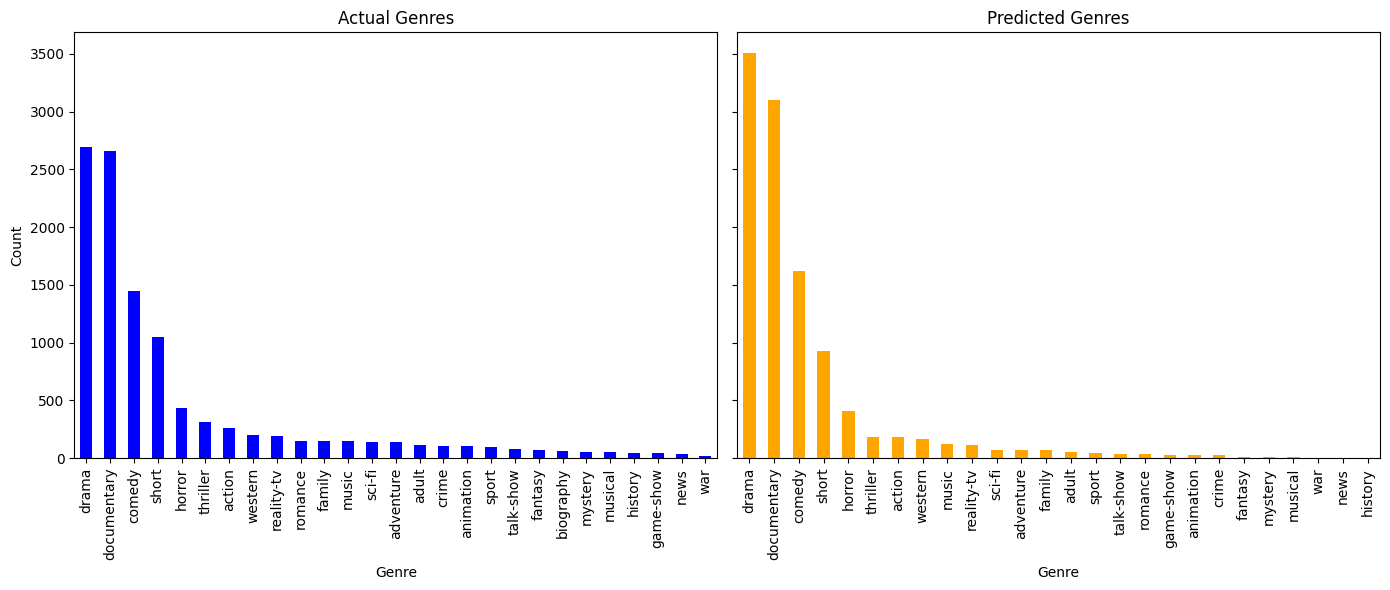

In [ ]:
# Plotting histograms of actual and predicted genres
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Actual genres
y_val.value_counts().plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Actual Genres')
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Count')

# Predicted genres
pd.Series(y_pred).value_counts().plot(kind='bar', ax=ax[1], color='orange')
ax[1].set_title('Predicted Genres')
ax[1].set_xlabel('Genre')

plt.tight_layout()
plt.show()